In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_columns=None

# Getting new variables to predict quality of life

In this notebook we will explore new variables from the TerriData database which will serve to better model and predict the Quality of Life (QoL) index. The complete TerriData database was downloaded and preprocessed in another notebook. The database was divided in several files based on the *dimension* they relate to. Each *dimension*, thus, includes several indicators which we will refer to as *variables* hereafter.

The first set of variables we will explore is from the `medicion de desempeño municipal` dimension:

In [2]:
def read_terridata(path_to_terridata_database):
    '''
    Function to pre-process TerriData tables:
    '''
    df = pd.read_csv(path_to_terridata_database, index_col=False)
    df = df.drop(columns=['Unnamed: 0', 'dimension'])
    df['codigo_departamento'] = df['codigo_departamento'].astype('object')
    df['codigo_entidad'] = df['codigo_entidad'].astype('object')
    return df

In [3]:
mdm_terridata = read_terridata('../data/TerriData_medicion_de_desempenio_municipal.csv')
mdm_terridata.head()

/Users/SebastianGuzman/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3338: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


codigo_departamento departamento codigo_entidad           entidad  \
0                  86     putumayo          86573  puerto_leguizamo   
1                  86     putumayo          86320             orito   
2                  86     putumayo          86571     puerto_guzman   
3                  85     casanare          85279           recetor   
4                  85     casanare          85263              pore   

  subcategoria                      indicador  dato_numerico dato_cualitativo  \
0  resumen_mdm  grupo_de_dotaciones_iniciales            NaN  G3- Nivel Medio   
1  resumen_mdm  grupo_de_dotaciones_iniciales            NaN  G3- Nivel Medio   
2  resumen_mdm  grupo_de_dotaciones_iniciales            NaN   G5- Nivel Bajo   
3  resumen_mdm  grupo_de_dotaciones_iniciales            NaN  G3- Nivel Medio   
4  resumen_mdm  grupo_de_dotaciones_iniciales            NaN   G1- Nivel Alto   

   anio  mes      fuente unidad_de_medida  
0  2016   12  dnp_-_dddr            texto  
1  2016   12  dnp_-_dddr            texto  
2  2016   12  dnp_-_dddr            texto  
3  2016   12  dnp_-_dddr            texto  
4  2016   12  dnp_-_dddr            texto

In [4]:
mdm_terridata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86373 entries, 0 to 86372
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   codigo_departamento  86373 non-null  object 
 1   departamento         86373 non-null  object 
 2   codigo_entidad       86373 non-null  object 
 3   entidad              86373 non-null  object 
 4   subcategoria         86373 non-null  object 
 5   indicador            86373 non-null  object 
 6   dato_numerico        82872 non-null  float64
 7   dato_cualitativo     3303 non-null   object 
 8   anio                 86373 non-null  int64  
 9   mes                  86373 non-null  int64  
 10  fuente               86373 non-null  object 
 11  unidad_de_medida     86373 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 7.9+ MB


The first thing to note about this dataset is that it is in a narrow form, with the values being in the columns `dato_numerico` and `dato_cualitativo` for quantitative and qualitative data respectively, while the name of the variables are condensed in the column `indicador`. This feature is common to all the TerriData datasets, so we will make similar procedures on all of them. We will pivot the table with the column `indicador` as columns and taking just the column `dato_numerico` as values. As index we will use a double index, with both the code of the municipality and the year of the data point, in order to later make a merge with our original MDM table (given by MinTIC).

First we do the pivot as is in order to know which columns could be of our interest:

In [5]:
pd.pivot(mdm_terridata, index=['anio', 'mes', 'codigo_entidad'], columns='indicador', values='dato_numerico').head()

indicador                acceso_a_servicios_publicos  componente_de_gestion  \
anio mes codigo_entidad                                                       
2016 12  1001                                    NaN                    NaN   
         5000                                    NaN                    NaN   
         5001                                  71.82                  80.64   
         5002                                  45.06                  51.12   
         5004                                  42.46                  45.00   

indicador                componente_de_gestion_-_posicion  \
anio mes codigo_entidad                                     
2016 12  1001                                         NaN   
         5000                                         NaN   
         5001                                         1.0   
         5002                                        57.0   
         5004                                       132.0   

indicador                componente_de_resultados  \
anio mes codigo_entidad                             
2016 12  1001                                 NaN   
         5000                                 NaN   
         5001                               77.20   
         5002                               67.20   
         5004                               73.16   

indicador                componente_de_resultados_-_posicion  educacion  \
anio mes codigo_entidad                                                   
2016 12  1001                                            NaN        NaN   
         5000                                            NaN        NaN   
         5001                                            1.0      60.01   
         5002                                          121.0      47.21   
         5004                                           18.0      61.97   

indicador                ejecucion_de_recursos  \
anio mes codigo_entidad                          
2016 12  1001                              NaN   
         5000                              NaN   
         5001                            91.47   
         5002                            61.38   
         5004                            59.06   

indicador                gobierno_abierto_y_transparencia  \
anio mes codigo_entidad                                     
2016 12  1001                                         NaN   
         5000                                         NaN   
         5001                                      100.00   
         5002                                       86.71   
         5004                                       66.67   

indicador                grupo_de_dotaciones_iniciales    mdm  mdm_-_posicion  \
anio mes codigo_entidad                                                         
2016 12  1001                                      NaN    NaN             NaN   
         5000                                      NaN    NaN             NaN   
         5001                                      NaN  80.78             1.0   
         5002                                      NaN  49.48            76.0   
         5004                                      NaN  44.94           132.0   

indicador                movilizacion_de_recursos  \
anio mes codigo_entidad                             
2016 12  1001                                 NaN   
         5000                                 NaN   
         5001                               84.79   
         5002                               17.58   
         5004                               21.05   

indicador                posicion_nacional_del_indicador_final_mdm  \
anio mes codigo_entidad                                              
2016 12  1001                                                  NaN   
         5000                                                  NaN   
         5001                                                  NaN   
         5002                                      

In [6]:
# These are the selected features:
selected_mdm_features = [
    'componente_de_resultados',
    'componente_de_gestion',
    'mdm',
    'gobierno_abierto_y_transparencia',
    'acceso_a_servicios_publicos',
    'educacion',
    'ejecucion_de_recursos',
    'salud',
    'seguridad'
]
# Next, it is important for us to know which are the measure units used for these features. In particular, we are interested in knowing whether some features are measured in more than a way:
for feature in selected_mdm_features:
    print(feature, mdm_terridata[mdm_terridata['indicador']==feature]['unidad_de_medida'].unique())

componente_de_resultados ['puntos']
componente_de_gestion ['puntos']
mdm ['puntos']
gobierno_abierto_y_transparencia ['puntos']
acceso_a_servicios_publicos ['puntos']
educacion ['puntos']
ejecucion_de_recursos ['puntos']
salud ['puntos']
seguridad ['puntos']


In [7]:
# We do the pivot:
terridata_resultados_gestion = pd.pivot(mdm_terridata, index=['anio', 'mes', 'codigo_entidad'], columns='indicador', values='dato_numerico')[selected_mdm_features].reset_index()
terridata_resultados_gestion.head()

indicador  anio  mes  codigo_entidad  componente_de_resultados  \
0          2016   12            1001                       NaN   
1          2016   12            5000                       NaN   
2          2016   12            5001                     77.20   
3          2016   12            5002                     67.20   
4          2016   12            5004                     73.16   

indicador  componente_de_gestion    mdm  gobierno_abierto_y_transparencia  \
0                            NaN    NaN                               NaN   
1                            NaN    NaN                               NaN   
2                          80.64  80.78                            100.00   
3                          51.12  49.48                             86.71   
4                          45.00  44.94                             66.67   

indicador  acceso_a_servicios_publicos  educacion  ejecucion_de_recursos  \
0                                  NaN        NaN                    NaN   
1                                  NaN        NaN                    NaN   
2                                71.82      60.01                  91.47   
3                                45.06      47.21                  61.38   
4                                42.46      61.97                  59.06   

indicador  salud  seguridad  
0            NaN        NaN  
1            NaN        NaN  
2          95.34      81.62  
3          85.44      91.10  
4          89.28      98.93

We see some missing data, but they are mostly from top-level entities such as departments or national level, since the data we are looking is just for municipalities. What we really need to see are the years this data covers:

In [8]:
terridata_resultados_gestion['anio'].unique()

array([2016, 2017, 2018])

Unfortunately, the data from TerriData just covers from 2016 to 2018 while the data provided by MinTIC covers from 2016 to 2019. As the `componente_de_resultados` column will be the regressed variable, we need data for that year in specific. I obtained that data from another TerriData table specific for that year.

We are also concerned by the fact that the TerriData database contains all the municipalities contained in the MinTIC dataset, so we check it:

In [9]:
df_final_vars = pd.read_csv('../data/df_merged_final_vars.csv')
print('Number of municipalities in the MinTIC database: ',len(df_final_vars['codigo_municipio'].unique()))
print('Number of entities in the TerriData database: ',len(terridata_resultados_gestion['codigo_entidad'].unique()))

Number of municipalities in the MinTIC database:  1101
Number of entities in the TerriData database:  1134


We see that the TerriData database has 33 more entities than those contained in the MinTIC database; those 33 additional entities correspond to 32 departments plus the nationl entity.

Next we load the 2019 MDM TerriData table, which has a different form (it is in wide form) and thus will be processed separately:

In [10]:
mdm_2019_terridata = pd.read_csv('../data/TerriData_mdm_2019.csv')
mdm_2019_terridata['Código DANE'] = mdm_2019_terridata['Código DANE'].astype('object')
mdm_2019_terridata['anio'] = [2019]*len(mdm_2019_terridata)
mdm_2019_terridata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Código DANE                       1101 non-null   object 
 1   Departamento                      1101 non-null   object 
 2   Munucipio                         1101 non-null   object 
 3   Movilización de recursos          1101 non-null   float64
 4   Ejecución de Recursos             1101 non-null   float64
 5   Gobierno Abierto y Transparencia  1101 non-null   float64
 6   Ordenamiento Territorial          1101 non-null   float64
 7   Puntaje Gestión                   1101 non-null   float64
 8   Educacion                         1101 non-null   float64
 9   Salud                             1101 non-null   float64
 10  Servicios                         1101 non-null   float64
 11  Seguridad                         1101 non-null   float64
 12  Puntaj

Well, since there are more municipalities in the TerriData database than in the MinTIC database, we'll procceed with the join of both tables. We already know that there are 1101 municipalities per year in the MinTIC database, and 4404 rows in total, but since we won't have data for 2019 (initiall) for the TerriData table, we'll do a left join and end up with missing data for 2019:

In [11]:
mdm_resultados_gestion = df_final_vars.merge(terridata_resultados_gestion, right_on=['codigo_entidad','anio'], left_on=['codigo_municipio', 'anio_corte'], how='left').drop(columns=['anio', 'codigo_entidad', 'mdm_y'])
mdm_resultados_gestion[mdm_resultados_gestion['anio_corte']==2019]

anio_corte        municipio  codigo_municipio departamento  \
3303        2019         medellin              5001    antioquia   
3304        2019        abejorral              5002    antioquia   
3305        2019         abriaqui              5004    antioquia   
3306        2019       alejandria              5021    antioquia   
3307        2019            amaga              5030    antioquia   
...          ...              ...               ...          ...   
4399        2019          taraira             97666       vaupes   
4400        2019  puerto_carrenio             99001      vichada   
4401        2019     la_primavera             99524      vichada   
4402        2019    santa_rosalia             99624      vichada   
4403        2019         cumaribo             99773      vichada   

     grupo_dotaciones     categoria_de_ruralidad  cobertura_media_neta  \
3303                c  ciudades_y_aglomeraciones                 0.496   
3304               g3                      rural                 0.379   
3305               g3             rural_disperso                 0.337   
3306               g2                      rural                 0.411   
3307               g2                intermedios                 0.350   
...               ...                        ...                   ...   
4399               g2             rural_disperso                 0.083   
4400               g1             rural_disperso                 0.260   
4401               g4             rural_disperso                 0.296   
4402               g2             rural_disperso                 0.177   
4403               g5             rural_disperso                 0.024   

      saber_11_matematicas  saber_11_lenguaje  cobertura_transicion  \
3303                50.304             53.520                 0.789   
3304                48.010             49.591                 0.577   
3305                43.676             47.941                 0.429   
3306                44.800             48.571                 0.605   
3307                46.007             49.736                 0.644   
...                    ...                ...                   ...   
4399                45.333             47.095                 0.286   
4400                46.873             49.463                 0.690   
4401                49.623             51.142                 0.482   
4402                44.700             46.675                 0.317   
4403                42.233             42.813                 0.285   

      cobertura_salud  mortalidad_infantil  cobertura_electrica_rural  \
3303            1.000                9.449                      1.000   
3304            0.765               15.804                      0.971   
3305            0.630               14.555                      0.851   
3306            0.740               17.044                      0.984   
3307            0.789               13.832                      0.990   
...               ...                  ...                        ...   
4399            0.562               85.616                      0.126   
4400            1.000               35.981                      0.324   
4401            0.918               36.501                      0.000   
4402            0.818               24.618                      0.000   
4403            0.539               66.887                      0.014   

      cobertura_internet  cobertura_acueducto  cobertura_alcantarillado  \
3303               0.243                0.968                     0.955   
3304               0.057                0.155                     0.155   
3305               0.043                0.387                     0.387   
3306               0.092                0.347                     0.345   
3307               0.105                1.000                     0.357   
...                  ...                  ...                       ...   
4399               0.009                0.977

Then, we fill the 2019 missing data with the separate MDM 2019 table from TerriData:

In [12]:
for i in range(len(mdm_resultados_gestion)):
    if mdm_resultados_gestion['anio_corte'].loc[i] == 2019:
        for j in range(len(mdm_2019_terridata)):
            if mdm_resultados_gestion['codigo_municipio'].loc[i] == mdm_2019_terridata['Código DANE'].loc[j]:
                mdm_resultados_gestion['componente_de_resultados'].loc[i] = mdm_2019_terridata['Puntaje Resultados'].loc[j]
                mdm_resultados_gestion['componente_de_gestion'].loc[i] = mdm_2019_terridata['Puntaje Gestión'].loc[j]
                mdm_resultados_gestion['gobierno_abierto_y_transparencia'].loc[i] = mdm_2019_terridata['Gobierno Abierto y Transparencia'].loc[j]
                mdm_resultados_gestion['acceso_a_servicios_publicos'].loc[i] = mdm_2019_terridata['Servicios'].loc[j]
                mdm_resultados_gestion['educacion'].loc[i] = mdm_2019_terridata['Educacion'].loc[j]
                mdm_resultados_gestion['ejecucion_de_recursos'].loc[i] = mdm_2019_terridata['Ejecución de Recursos'].loc[j]
                mdm_resultados_gestion['salud'].loc[i] = mdm_2019_terridata['Salud'].loc[j]
                mdm_resultados_gestion['seguridad'].loc[i] = mdm_2019_terridata['Seguridad'].loc[j]

# Finally, we let all the data to be in 0-1 form:
for feature in ['mdm_x','componente_de_resultados','componente_de_gestion','gobierno_abierto_y_transparencia','acceso_a_servicios_publicos','educacion','ejecucion_de_recursos','salud','seguridad']:
    mdm_resultados_gestion[feature] = mdm_resultados_gestion[feature]/100

/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [13]:
# Just to make sure everything is in order with the new variables:
mdm_resultados_gestion[['mdm_x','componente_de_resultados','componente_de_gestion','gobierno_abierto_y_transparencia','acceso_a_servicios_publicos','educacion','ejecucion_de_recursos','salud','seguridad']].describe()

mdm_x  componente_de_resultados  componente_de_gestion  \
count  4404.000000               4404.000000            4404.000000   
mean      0.503723                  0.670322               0.503703   
std       0.101703                  0.050439               0.101517   
min       0.020333                  0.436110               0.020110   
25%       0.439500                  0.641400               0.440050   
50%       0.502096                  0.675000               0.501565   
75%       0.565501                  0.703782               0.565408   
max       0.868169                  0.832600               0.852850   

       gobierno_abierto_y_transparencia  acceso_a_servicios_publicos  \
count                       4404.000000                  4404.000000   
mean                           0.770494                     0.466987   
std                            0.208303                     0.115283   
min                            0.000000                     0.031700   
25%                            0.640275                     0.394418   
50%                            0.837700                     0.466730   
75%                            0.956420                     0.543000   
max                            1.000000                     0.864120   

         educacion  ejecucion_de_recursos        salud    seguridad  
count  4404.000000            4404.000000  4404.000000  4404.000000  
mean      0.477094               0.677164     0.840943     0.896268  
std       0.096542               0.141649     0.082093     0.083181  
min       0.154000               0.000000     0.368000     0.397150  
25%       0.416675               0.584175     0.798950     0.859125  
50%       0.477035               0.670950     0.853000     0.916600  
75%       0.535400               0.778212     0.901000     0.956678  
max       0.857000               1.000000     0.990000     1.000000

We plot the total investments against our QoL variables: `componente_de_resultados`, `salud`, `educacion`, `seguridad` y `acceso_a_servicios_publicos` just to look for possible patterns between these variables:

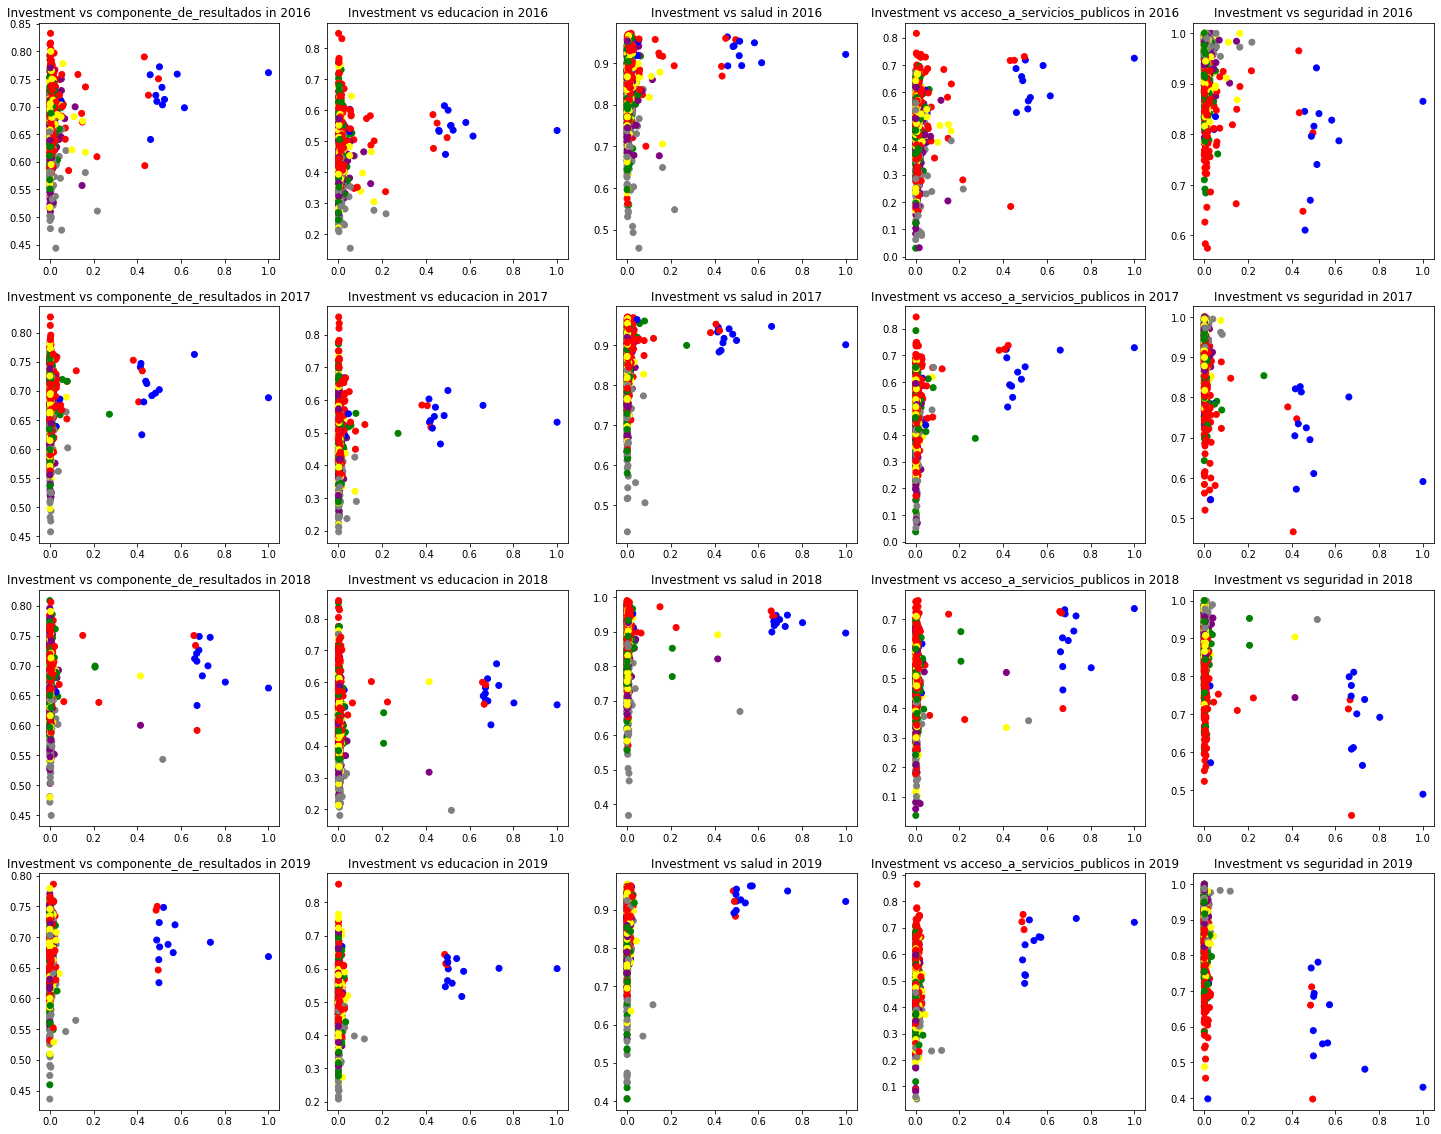

In [14]:
def min_max_standarize(feature, new_min=0, new_max=1):
    new_feature = [
        (x - feature.min()) / (feature.max() - feature.min()) * (new_max - new_min) + new_min for x in feature
    ]
    return pd.Series(new_feature)

c_map={'c':'blue', 'g1':'red', 'g2':'green', 'g3':'yellow', 'g4':'purple', 'g5':'gray'}
fig, ax = plt.subplots(4,5, figsize=(25,20))
feats = ['componente_de_resultados','educacion','salud','acceso_a_servicios_publicos','seguridad']
anios = list(mdm_resultados_gestion['anio_corte'].unique())
for feature in range(len(feats)):
    for anio in range(len(anios)):
        title = 'Investment vs ' + feats[feature] + ' in '+ str(anios[anio])
        ax[anio, feature].scatter(
            x=min_max_standarize(mdm_resultados_gestion[mdm_resultados_gestion['anio_corte']==anios[anio]]['inversion']), 
            y=mdm_resultados_gestion[mdm_resultados_gestion['anio_corte']==anios[anio]][feats[feature]], 
            c=[c_map[_] for _ in mdm_resultados_gestion[mdm_resultados_gestion['anio_corte']==anios[anio]]['grupo_dotaciones']]
        )
        ax[anio, feature].set_title(title)

As we could not find meaningful patterns, it is necessary to look for more variables to better model QoL. Then, from that model, we could infer the importance and impact of MinTIC investments over QoL.

The `mdm_resultados_gestion` DataFrame will be our final table, with all our variables of interest. In the following, we will be attaching variables from other TerriData tables, only if those variables meet the main requirements:
1. To have near complete data for municipalities.
2. To have data for at least 2016-2018.

Next we will do process for the next database: **Economy**

In [15]:
economy_terridata = read_terridata('../data/TerriData_economia.csv')
economy_terridata.head()

/Users/SebastianGuzman/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3338: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


codigo_departamento  departamento codigo_entidad   entidad  \
0                  25  cundinamarca          25436     manta   
1                  25  cundinamarca          25489   nimaima   
2                  25  cundinamarca          25473  mosquera   
3                  25  cundinamarca          25430    madrid   
4                  25  cundinamarca          25580      puli   

                 subcategoria  \
0  valor_agregado_-_base_2015   
1  valor_agregado_-_base_2015   
2  valor_agregado_-_base_2015   
3  valor_agregado_-_base_2015   
4  valor_agregado_-_base_2015   

                                           indicador  dato_numerico  \
0  agricultura;_ganaderia;_caza;_silvicultura_y_p...          22.14   
1  agricultura;_ganaderia;_caza;_silvicultura_y_p...           4.60   
2  agricultura;_ganaderia;_caza;_silvicultura_y_p...           1.29   
3  agricultura;_ganaderia;_caza;_silvicultura_y_p...           9.55   
4  agricultura;_ganaderia;_caza;_silvicultura_y_p...          23.76   

  dato_cualitativo  anio  mes                                 fuente  \
0              NaN  2011   12  dnp__a_partir_de_informacion_del_dane   
1              NaN  2011   12  dnp__a_partir_de_informacion_del_dane   
2              NaN  2011   12  dnp__a_partir_de_informacion_del_dane   
3              NaN  2011   12  dnp__a_partir_de_informacion_del_dane   
4              NaN  2011   12  dnp__a_partir_de_informacion_del_dane   

                                  unidad_de_medida  
0  porcentaje_(el_valor_esta_multiplicado_por_100)  
1  porcentaje_(el_valor_esta_multiplicado_por_100)  
2  porcentaje_(el_valor_esta_multiplicado_por_100)  
3  porcentaje_(el_valor_esta_multiplicado_por_100)  
4  porcentaje_(el_valor_esta_multiplicado_por_100)

In [16]:
economy_terridata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414637 entries, 0 to 414636
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   codigo_departamento  414637 non-null  object 
 1   departamento         414637 non-null  object 
 2   codigo_entidad       414637 non-null  object 
 3   entidad              414637 non-null  object 
 4   subcategoria         414637 non-null  object 
 5   indicador            414637 non-null  object 
 6   dato_numerico        215170 non-null  float64
 7   dato_cualitativo     7956 non-null    object 
 8   anio                 414637 non-null  int64  
 9   mes                  414637 non-null  int64  
 10  fuente               414637 non-null  object 
 11  unidad_de_medida     414637 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 38.0+ MB


In [17]:
# We are only interested in the data for 2016 and up:
economy_terridata = economy_terridata[economy_terridata['anio']>2015]

In [18]:
len(economy_terridata['codigo_entidad'].unique())

1134

In [19]:
# Unfortunately, many variables from the economy dataset have very few data points (just for departamental or national levels), so we wanna filter out these variables:
def select_features(df):
    selected_df_features = []
    for indicador in list(df['indicador'].unique()):
        if len(df[df['indicador']==indicador]['anio'].unique()) > 2 and len(df[df['indicador']==indicador]) > 1000:
            selected_df_features.append(indicador)
            print(indicador, len(df[df['indicador']==indicador]), df[df['indicador']==indicador]['anio'].unique())
    return selected_df_features

In [20]:
selected_economy_features = select_features(economy_terridata)

valor_agregado 3303 [2016 2017 2018]
valor_agregado_per_capita 3303 [2016 2017 2018]
valor_agregado_per_capita_como_porcentaje_del_promedio_nacional 3303 [2016 2017 2018]
participacion_del_valor_agregado_municipal_en_el_departamental 3303 [2016 2017 2018]
valor_agregado_por_actividades_economicas_-_actividades_primarias 3303 [2016 2017 2018]
valor_agregado_por_actividades_economicas_-_actividades_secundarias 3303 [2016 2017 2018]
valor_agregado_por_actividades_economicas_-_actividades_terciarias 3303 [2016 2017 2018]
porcentaje_del_valor_agregado_por_actividades_economicas_-_actividades_primarias 3303 [2016 2017 2018]
porcentaje_del_valor_agregado_por_actividades_economicas_-_actividades_secundarias 3303 [2016 2017 2018]
porcentaje_del_valor_agregado_por_actividades_economicas_-_actividades_terciarias 3303 [2016 2017 2018]


In [21]:
economy_terridata = economy_terridata[economy_terridata['indicador'].isin(selected_economy_features)]
economy_terridata

codigo_departamento departamento codigo_entidad         entidad  \
369496                  95     guaviare          95015         calamar   
369497                  97       vaupes          97161          caruru   
369498                  95     guaviare          95025      el_retorno   
369499                  86     putumayo          86219           colon   
369500                  85     casanare          85430        trinidad   
...                    ...          ...            ...             ...   
408026                  86     putumayo          86569  puerto_caicedo   
408027                  86     putumayo          86755   san_francisco   
408028                  81       arauca          81591   puerto_rondon   
408029                  81       arauca          81736        saravena   
408030                  81       arauca          81001          arauca   

                    subcategoria  \
369496  valor_agregado_municipal   
369497  valor_agregado_municipal   
369498  valor_agregado_municipal   
369499  valor_agregado_municipal   
369500  valor_agregado_municipal   
...                          ...   
408026  valor_agregado_municipal   
408027  valor_agregado_municipal   
408028  valor_agregado_municipal   
408029  valor_agregado_municipal   
408030  valor_agregado_municipal   

                                                indicador  dato_numerico  \
369496                                     valor_agregado          56.54   
369497                                     valor_agregado          21.77   
369498                                     valor_agregado         133.55   
369499                                     valor_agregado          25.67   
369500                                     valor_agregado         379.40   
...                                                   ...            ...   
408026  porcentaje_del_valor_agregado_por_actividades_...          65.89   
408027  porcentaje_del_valor_agregado_por_actividades_...          80.32   
408028  porcentaje_del_valor_agregado_por_actividades_...          37.27   
408029  porcentaje_del_valor_agregado_por_actividades_...          67.95   
408030  porcentaje_del_valor_agregado_por_actividades_...          30.52   

       dato_cualitativo  anio  mes                        fuente  \
369496              NaN  2016   12                          dane   
369497              NaN  2016   12                          dane   
369498              NaN  2016   12                          dane   
369499              NaN  2016   12                          dane   
369500              NaN  2016   12                          dane   
...                 ...   ...  ...                           ...   
408026              NaN  2018   12  dnp_con_informacion_del_dane   
408027              NaN  2018   12  dnp_con_informacion_del_dane   
408028              NaN  2018   12  dnp_con_informacion_del_dane   
408029              NaN  2018   12  dnp_con_informacion_del_dane   
408030              NaN  2018   12  dnp_con_informacion_del_dane   

                             unidad_de_medida  
369496  miles_de_millones_de_pesos_corrientes  
369497  miles_de_millones_de_pesos_corrientes  
369498  miles_de_millones_de_pesos_corrientes  
369499  miles_de_millones_de_pesos_corrientes  
369500  miles_de_millones_de_pesos_corrientes  
...                                       ...  
408026                             porcentaje  
408027                             porcentaje  
408028                             porcentaje  
408029                             porcentaje  
408030                             porcentaje  

[33030 rows x 12 columns]

In [22]:
# We do the join of the mdm_resultados_gestion table with the selected variables from the pivoted economy_terridata table:
mdm_resultados_gestion = mdm_resultados_gestion.merge(
    pd.pivot(economy_terridata, index=['anio', 'mes', 'codigo_entidad'], columns='indicador', values='dato_numerico').reset_index(),
    left_on=['codigo_municipio', 'anio_corte'],
    right_on=['codigo_entidad','anio'],
    how='left'
).drop(columns=['anio', 'codigo_entidad', 'mes_x', 'mes_y'])

In [23]:
mdm_resultados_gestion.tail()

anio_corte        municipio  codigo_municipio departamento  \
4399        2019          taraira             97666       vaupes   
4400        2019  puerto_carrenio             99001      vichada   
4401        2019     la_primavera             99524      vichada   
4402        2019    santa_rosalia             99624      vichada   
4403        2019         cumaribo             99773      vichada   

     grupo_dotaciones categoria_de_ruralidad  cobertura_media_neta  \
4399               g2         rural_disperso                 0.083   
4400               g1         rural_disperso                 0.260   
4401               g4         rural_disperso                 0.296   
4402               g2         rural_disperso                 0.177   
4403               g5         rural_disperso                 0.024   

      saber_11_matematicas  saber_11_lenguaje  cobertura_transicion  \
4399                45.333             47.095                 0.286   
4400                46.873             49.463                 0.690   
4401                49.623             51.142                 0.482   
4402                44.700             46.675                 0.317   
4403                42.233             42.813                 0.285   

      cobertura_salud  mortalidad_infantil  cobertura_electrica_rural  \
4399            0.562               85.616                      0.126   
4400            1.000               35.981                      0.324   
4401            0.918               36.501                      0.000   
4402            0.818               24.618                      0.000   
4403            0.539               66.887                      0.014   

      cobertura_internet  cobertura_acueducto  cobertura_alcantarillado  \
4399               0.009                0.977                     0.977   
4400               0.065                0.613                     0.000   
4401               0.001                0.485                     0.000   
4402               0.004                0.701                     0.000   
4403               0.001                0.227                     0.108   

      hurtos_x_10000_hab  homicidios_x_10000_hab  \
4399            8.628128                0.000000   
4400          102.080688                7.326365   
4401           10.205123                0.000000   
4402            4.842615                2.421308   
4403            2.493569                0.524962   

      violencia_intrafamiliar_x_10000_hab     mdm_x  codigo_departamento  \
4399                            47.454702  0.424705                   97   
4400                            21.979095  0.575668                   99   
4401                             6.123074  0.562870                   99   
4402                             4.842615  0.488865                   99   
4403                             0.656202  0.415129                   99   

      inversion  inversion_conectividad  inversion_transformacion  \
4399          0                       0                         0   
4400  542560045               534281300                   8278745   
4401    2039429                       0                   2039429   
4402          0                       0                         0   
4403    2039429                       0                   2039429   

      vacunacion_pentavalente_0_1  componente_de_resultados  \
4399                        0.600                   0.45933   
4400                        1.000                   0.55230   
4401                        0.815                   0.56152   
4402                        0.988                   0.55968   
4403                        0.484                   0.43611   

      componente_de_gestion  gobierno_abierto_y_transparencia  \
4399                0.48021                           0.75648   
4400                0.58912                           0.84847   
4401                0.55786                           0.83225   
4402                0.50046        

Next, **Armed Conflict** data:

In [24]:
armed_conflict_terridata = read_terridata('../data/TerriData_conflicto_armado_y_seguridad_ciudadana.csv')
armed_conflict_terridata.head()

/Users/SebastianGuzman/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3338: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


codigo_departamento departamento codigo_entidad     entidad  \
0                  99      vichada          99000     vichada   
1                  97       vaupes          97161      caruru   
2                  95     guaviare          95015     calamar   
3                  95     guaviare          95025  el_retorno   
4                  97       vaupes          97000      vaupes   

       subcategoria                                  indicador  dato_numerico  \
0  conflicto_armado  numero_acumulado_de_personas_secuestradas          134.0   
1  conflicto_armado  numero_acumulado_de_personas_secuestradas           17.0   
2  conflicto_armado  numero_acumulado_de_personas_secuestradas           66.0   
3  conflicto_armado  numero_acumulado_de_personas_secuestradas           68.0   
4  conflicto_armado  numero_acumulado_de_personas_secuestradas          131.0   

  dato_cualitativo  anio  mes  \
0      1984 - 2017  2017   12   
1      1984 - 2017  2017   12   
2      1984 - 2017  2017   12   
3      1984 - 2017  2017   12   
4      1984 - 2017  2017   12   

                                              fuente unidad_de_medida  
0  unidad_para_la_atencion_y_reparacion_integral_...         personas  
1  unidad_para_la_atencion_y_reparacion_integral_...         personas  
2  unidad_para_la_atencion_y_reparacion_integral_...         personas  
3  unidad_para_la_atencion_y_reparacion_integral_...         personas  
4  unidad_para_la_atencion_y_reparacion_integral_...         personas

In [25]:
armed_conflict_terridata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314118 entries, 0 to 314117
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   codigo_departamento  314118 non-null  object 
 1   departamento         314118 non-null  object 
 2   codigo_entidad       314118 non-null  object 
 3   entidad              314118 non-null  object 
 4   subcategoria         314118 non-null  object 
 5   indicador            314118 non-null  object 
 6   dato_numerico        259158 non-null  float64
 7   dato_cualitativo     4536 non-null    object 
 8   anio                 314118 non-null  int64  
 9   mes                  314118 non-null  int64  
 10  fuente               314118 non-null  object 
 11  unidad_de_medida     314118 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 28.8+ MB


In [26]:
print(armed_conflict_terridata['anio'].unique())
print(armed_conflict_terridata['mes'].unique())
print(len(armed_conflict_terridata['codigo_entidad'].unique()))

[2017 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996
 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2018]
[12]
1134


In [27]:
armed_conflict_terridata = armed_conflict_terridata[armed_conflict_terridata['anio']>2015]

In [28]:
# Unfortunately, many variables from the armed conflict dataset have very few data points (just for departamental or national levels), so we wanna filter out these variables:
selected_armed_conflict_features = select_features(armed_conflict_terridata)

tasa_de_violencias_basadas_en_genero 3402 [2016 2017 2018]


In [29]:
armed_conflict_terridata = armed_conflict_terridata[armed_conflict_terridata['indicador'].isin(selected_armed_conflict_features)]
armed_conflict_terridata

codigo_departamento departamento codigo_entidad         entidad  \
310716                  99      vichada          99000         vichada   
310717                  97       vaupes          97161          caruru   
310718                  95     guaviare          95015         calamar   
310719                  97       vaupes          97000          vaupes   
310720                  95     guaviare          95025      el_retorno   
...                    ...          ...            ...             ...   
314113                  81       arauca          81591   puerto_rondon   
314114                  81       arauca          81001          arauca   
314115                  86     putumayo          86569  puerto_caicedo   
314116                  86     putumayo          86755   san_francisco   
314117                  86     putumayo          86757      san_miguel   

                subcategoria                             indicador  \
310716  violencias_de_genero  tasa_de_violencias_basadas_en_genero   
310717  violencias_de_genero  tasa_de_violencias_basadas_en_genero   
310718  violencias_de_genero  tasa_de_violencias_basadas_en_genero   
310719  violencias_de_genero  tasa_de_violencias_basadas_en_genero   
310720  violencias_de_genero  tasa_de_violencias_basadas_en_genero   
...                      ...                                   ...   
314113  violencias_de_genero  tasa_de_violencias_basadas_en_genero   
314114  violencias_de_genero  tasa_de_violencias_basadas_en_genero   
314115  violencias_de_genero  tasa_de_violencias_basadas_en_genero   
314116  violencias_de_genero  tasa_de_violencias_basadas_en_genero   
314117  violencias_de_genero  tasa_de_violencias_basadas_en_genero   

        dato_numerico dato_cualitativo  anio  mes  \
310716         464.73              NaN  2016   12   
310717         425.02              NaN  2016   12   
310718         500.75              NaN  2016   12   
310719         292.12              NaN  2016   12   
310720         163.72              NaN  2016   12   
...               ...              ...   ...  ...   
314113         271.15              NaN  2018   12   
314114         351.57              NaN  2018   12   
314115         378.33              NaN  2018   12   
314116         195.53              NaN  2018   12   
314117         173.49              NaN  2018   12   

                                         fuente  \
310716  ministerio_de_salud_y_proteccion_social   
310717  ministerio_de_salud_y_proteccion_social   
310718  ministerio_de_salud_y_proteccion_social   
310719  ministerio_de_salud_y_proteccion_social   
310720  ministerio_de_salud_y_proteccion_social   
...                                         ...   
314113  ministerio_de_salud_y_proteccion_social   
314114  ministerio_de_salud_y_proteccion_social   
314115  ministerio_de_salud_y_proteccion_social   
314116  ministerio_de_salud_y_proteccion_social   
314117  ministerio_de_salud_y_proteccion_social   

                                         unidad_de_medida  
310716  casos_de_violencia_hacia_mujeres__por_cada_100...  
310717  casos_de_violencia_hacia_mujeres__por_cada_100...  
310718  casos_de_violencia_hacia_mujeres__por_cada_100...  
310719  casos_de_violencia_hacia_mujeres__por_cada_100...  
310720  casos_de_violencia_hacia_mujeres__por_cada_100...  
...                                                   ...  
314113  casos_de_violencia_hacia_mujeres__por_cada_100...  
314114  casos_de_violencia_hacia_mujeres__por_cada_100...  
314115  casos_de_violencia_hacia_mujeres__por_cada_100...  
314116  casos_de_violencia_hacia_mujeres__por_cada_100...  
314117  casos_de_violencia_hacia_mujeres__por_cada_100...  

[3402 rows x 12 columns]

In [30]:
mdm_resultados_gestion = mdm_resultados_gestion.merge(
    pd.pivot(armed_conflict_terridata, index=['anio', 'mes', 'codigo_entidad'], columns='indicador', values='dato_numerico').reset_index(),
    left_on=['codigo_municipio', 'anio_corte'],
    right_on=['codigo_entidad','anio'],
    how='left'
).drop(columns=['anio', 'codigo_entidad', 'mes'])

In [31]:
mdm_resultados_gestion.head(2)

anio_corte  municipio  codigo_municipio departamento grupo_dotaciones  \
0        2016   medellin              5001    antioquia                c   
1        2016  abejorral              5002    antioquia               g3   

      categoria_de_ruralidad  cobertura_media_neta  saber_11_matematicas  \
0  ciudades_y_aglomeraciones                 0.559                 49.26   
1                      rural                 0.329                 48.10   

   saber_11_lenguaje  cobertura_transicion  cobertura_salud  \
0              51.70                 0.737            1.000   
1              51.28                 0.590            0.882   

   mortalidad_infantil  cobertura_electrica_rural  cobertura_internet  \
0                11.12                       1.00               0.214   
1                13.16                       0.98               0.046   

   cobertura_acueducto  cobertura_alcantarillado  hurtos_x_10000_hab  \
0                 0.97                      0.92               55.78   
1                 0.37                      0.28               14.59   

   homicidios_x_10000_hab  violencia_intrafamiliar_x_10000_hab   mdm_x  \
0                    2.16                                 9.55  0.8078   
1                    3.65                                 6.77  0.4948   

   codigo_departamento    inversion  inversion_conectividad  \
0                    5  24698428098               223686523   
1                    5     86075327                24371542   

   inversion_transformacion  vacunacion_pentavalente_0_1  \
0               24474741575                        0.971   
1                  61703785                        0.813   

   componente_de_resultados  componente_de_gestion  \
0                     0.772                 0.8064   
1                     0.672                 0.5112   

   gobierno_abierto_y_transparencia  acceso_a_servicios_publicos  educacion  \
0                            1.0000                       0.7182     0.6001   
1                            0.8671                       0.4506     0.4721   

   ejecucion_de_recursos   salud  seguridad  \
0                 0.9147  0.9534     0.8162   
1                 0.6138  0.8544     0.9110   

   participacion_del_valor_agregado_municipal_en_el_departamental  \
0                                              42.55                
1                                               0.18                

   porcentaje_del_valor_agregado_por_actividades_economicas_-_actividades_primarias  \
0                                               0.29                                  
1                                              35.04                                  

   porcentaje_del_valor_agregado_por_actividades_economicas_-_actividades_secundarias  \
0                                              25.04                                    
1                                               8.70                                    

   porcentaje_del_valor_agregado_por_actividades_economicas_-_actividades_terciarias  \
0                                              74.67                                   
1                                              56.26                                   

   valor_agregado  valor_agregado_per_capita  \
0        48914.58                 19670298.0   
1          195.31                 10175034.0   

   valor_agregado_per_capita_como_porcentaje_del_promedio_nacional  \
0                                             146.00                 
1                                              75.52                 

   valor_agregado_por_actividades_economicas_-_actividades_primarias  \
0                                             141.80                   
1                                              68.43                   

   valor_agregado_por_actividades_economicas_-_actividades_secundarias  \
0                                           12248.42                     
1                                              17.00     

In [32]:
citizen_percep_terridata = read_terridata('../data/TerriData_percepcion_ciudadana.csv')
citizen_percep_terridata.head()

codigo_departamento        departamento codigo_entidad       entidad  \
0                  20               cesar          20001    valledupar   
1                  68           santander          68001   bucaramanga   
2                   8           atlantico           8001  barranquilla   
3                  54  norte_de_santander          54001        cucuta   
4                  76     valle_del_cauca          76001          cali   

         subcategoria  indicador  dato_numerico  dato_cualitativo  anio  mes  \
0  imagen_del_alcalde  favorable          48.03               NaN  2014   12   
1  imagen_del_alcalde  favorable          38.63               NaN  2015   12   
2  imagen_del_alcalde  favorable          63.91               NaN  2015   12   
3  imagen_del_alcalde  favorable          34.60               NaN  2015   12   
4  imagen_del_alcalde  favorable          27.62               NaN  2015   12   

     fuente                                 unidad_de_medida  
0  ciudatos  porcentaje_(el_valor_esta_multiplicado_por_100)  
1  ciudatos  porcentaje_(el_valor_esta_multiplicado_por_100)  
2  ciudatos  porcentaje_(el_valor_esta_multiplicado_por_100)  
3  ciudatos  porcentaje_(el_valor_esta_multiplicado_por_100)  
4  ciudatos  porcentaje_(el_valor_esta_multiplicado_por_100)

In [33]:
citizen_percep_terridata[~citizen_percep_terridata['dato_numerico'].isna()]['codigo_entidad'].unique()

array([20001, 68001, 8001, 54001, 76001, 73001, 13001, 66001, 5001, 11001,
       17001, 68307, 76364, 5380, 5360, 47001, 63001, 68276, 68547, 5631,
       76892], dtype=object)

There are just not enough data from the `percepcion_ciudadana` database

In [34]:
environ_terridata = read_terridata('../data/TerriData_ambiente.csv')
environ_terridata

/Users/SebastianGuzman/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3338: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


codigo_departamento departamento codigo_entidad         entidad  \
0                       97       vaupes          97161          caruru   
1                       99      vichada          99000         vichada   
2                       95     guaviare          95015         calamar   
3                       95     guaviare          95025      el_retorno   
4                       97       vaupes          97000          vaupes   
...                    ...          ...            ...             ...   
181844                  81       arauca          81001          arauca   
181845                  81       arauca          81736        saravena   
181846                  86     putumayo          86569  puerto_caicedo   
181847                  86     putumayo          86757      san_miguel   
181848                  86     putumayo          86755   san_francisco   

                                             subcategoria  \
0       biodiversidad_y_servicios_ecosistemicos:_area_...   
1       biodiversidad_y_servicios_ecosistemicos:_area_...   
2       biodiversidad_y_servicios_ecosistemicos:_area_...   
3       biodiversidad_y_servicios_ecosistemicos:_area_...   
4       biodiversidad_y_servicios_ecosistemicos:_area_...   
...                                                   ...   
181844                            vulnerabilidad_y_riesgo   
181845                            vulnerabilidad_y_riesgo   
181846                            vulnerabilidad_y_riesgo   
181847                            vulnerabilidad_y_riesgo   
181848                            vulnerabilidad_y_riesgo   

                                                indicador  dato_numerico  \
0       area_de_la_entidad_territorial_que_hace_parte_...        8342.85   
1       area_de_la_entidad_territorial_que_hace_parte_...      574324.79   
2       area_de_la_entidad_territorial_que_hace_parte_...      418608.21   
3       area_de_la_entidad_territorial_que_hace_parte_...      651792.66   
4       area_de_la_entidad_territorial_que_hace_parte_...      577056.87   
...                                                   ...            ...   
181844          indice_de_riesgo_ajustado_por_capacidades          60.19   
181845          indice_de_riesgo_ajustado_por_capacidades          46.19   
181846          indice_de_riesgo_ajustado_por_capacidades          42.20   
181847          indice_de_riesgo_ajustado_por_capacidades          43.57   
181848          indice_de_riesgo_ajustado_por_capacidades          45.68   

       dato_cualitativo  anio  mes                        fuente  \
0                   NaN  2017   12  parques_nacionales_naturales   
1                   NaN  2017   12  parques_nacionales_naturales   
2                   NaN  2017   12  parques_nacionales_naturales   
3                   NaN  2017   12  parques_nacionales_naturales   
4                   NaN  2017   12  parques_nacionales_naturales   
...                 ...   ...  ...                           ...   
181844              NaN  2018   12                           dnp   
181845              NaN  2018   12                           dnp   
181846              NaN  2018   12                           dnp   
181847              NaN  2018   12                           dnp   
181848              NaN  2018   12                           dnp   

       unidad_de_medida  
0             hectareas  
1             hectareas  
2             hectareas  
3             hectareas  
4             hectareas  
...                 ...  
181844           puntos  
181845           puntos  
181846           puntos  
181847           puntos  
181848           puntos  

[181849 rows x 12 columns]

In [35]:
len(environ_terridata['codigo_entidad'].unique())

1134

In [36]:
pd.pivot(environ_terridata, columns='indicador', values='dato_numerico', index=['codigo_entidad', 'anio']).info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 12474 entries, (1001, 2000) to (99773, 2018)
Data columns (total 85 columns):
 #   Column                                                                                        Non-Null Count  Dtype  
---  ------                                                                                        --------------  -----  
 0   absorcion_de_gei                                                                              32 non-null     float64
 1   acumulado_anual_de_precipitacion                                                              7707 non-null   float64
 2   area_de_bosque_estable_de_la_entidad_territorial                                              9042 non-null   float64
 3   area_de_bosque_seco_tropical                                                                  1134 non-null   float64
 4   area_de_humedales                                                                             1134 non-null   float64
 5   area_d

As for the `medio_ambiente` data, although there are many variables thoroughly represented geographically, those variables lack temporal representativity, so I'm not sure whether or not it would be correct to use it nonetheless. I'll pass from it for now.

The next table I'm interested at is the `finanzas_publicas` table, which contains lots of information:

In [37]:
publc_finances_terridata = read_terridata('../data/TerriData_finanzas_publicas.csv')
# We filter out data before 2016:
publc_finances_terridata = publc_finances_terridata[publc_finances_terridata['anio']>2015]
publc_finances_terridata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 464282 entries, 18144 to 1373138
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   codigo_departamento  464282 non-null  object 
 1   departamento         464282 non-null  object 
 2   codigo_entidad       464282 non-null  object 
 3   entidad              464282 non-null  object 
 4   subcategoria         464282 non-null  object 
 5   indicador            464282 non-null  object 
 6   dato_numerico        448091 non-null  float64
 7   dato_cualitativo     0 non-null       float64
 8   anio                 464282 non-null  int64  
 9   mes                  464282 non-null  int64  
 10  fuente               464282 non-null  object 
 11  unidad_de_medida     464282 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 46.0+ MB


As some variables in this table are measured more than once in a year, but our original `mdm_resultados_gestion` holds data yearly, we must let variables measured more than once in a year out:

In [38]:
more_than_anual_vars = []
anual_vars = []
for indicador in list(publc_finances_terridata['indicador'].unique()):
    if len(publc_finances_terridata[publc_finances_terridata['indicador']==indicador]['mes'].unique()) > 1:
        more_than_anual_vars.append(indicador)
    else:
        anual_vars.append(indicador)

print('Quantity of variables measured annually: ',len(anual_vars),'\nQuantity of variables measured more than once in a year: ', len(more_than_anual_vars))

Quantity of variables measured annually:  96 
Quantity of variables measured more than once in a year:  14


In [39]:
publc_finances_terridata = publc_finances_terridata[publc_finances_terridata['indicador'].isin(anual_vars)]
publc_finances_terridata.head()

codigo_departamento  departamento codigo_entidad       entidad  \
18144                  23       cordoba          23855      valencia   
18145                  25  cundinamarca          25035      anapoima   
18146                  23       cordoba          23555  planeta_rica   
18147                  23       cordoba          23300       cotorra   
18148                  23       cordoba          23090      canalete   

                        subcategoria         indicador  dato_numerico  \
18144  operaciones_efectivas_de_caja  ingresos_totales       37106.64   
18145  operaciones_efectivas_de_caja  ingresos_totales       30520.09   
18146  operaciones_efectivas_de_caja  ingresos_totales       63062.06   
18147  operaciones_efectivas_de_caja  ingresos_totales       18368.43   
18148  operaciones_efectivas_de_caja  ingresos_totales       21538.29   

       dato_cualitativo  anio  mes                               fuente  \
18144               NaN  2016   12  dnp_a_partir_de_informacion_del_fut   
18145               NaN  2016   12  dnp_a_partir_de_informacion_del_fut   
18146               NaN  2016   12  dnp_a_partir_de_informacion_del_fut   
18147               NaN  2016   12  dnp_a_partir_de_informacion_del_fut   
18148               NaN  2016   12  dnp_a_partir_de_informacion_del_fut   

                   unidad_de_medida  
18144  millones_de_pesos_corrientes  
18145  millones_de_pesos_corrientes  
18146  millones_de_pesos_corrientes  
18147  millones_de_pesos_corrientes  
18148  millones_de_pesos_corrientes

Nevertheless we should bear in mind those variables measured more than once in a year, since they could have interesting information; for its use, perhaps we should look for a way of summarize those data in a yearly fashion:

In [114]:
print(more_than_anual_vars)

['total_de_asignaciones_sgr_2017-2018', 'numero_de_proyectos_terminados', 'numero_de_proyectos_contratados', 'numero_de_proyectos_sin_contratar', 'numero_total_de_proyectos', 'valor_de_los_proyectos_terminados', 'valor_de_los_proyectos_contratados', 'valor_de_los_proyectos_sin_contratar', 'valor_del_numero_total_de_proyectos', 'indice_de_gestion_de_proyectos_de_regalias_(igpr)', 'componente_-_transparencia', 'componente_-_sin_medidas_del_smsce', 'componente_-_eficiencia_', 'componente_-_eficacia_']


Next we select our features based on completeness of data:

In [40]:
selected_public_finances_features = select_features(publc_finances_terridata)

ingresos_totales 4535 [2016 2017 2018 2019]
ingresos_corrientes 4535 [2016 2017 2018 2019]
ingresos_tributarios 4535 [2016 2017 2018 2019]
ingresos_no_tributarios 4535 [2016 2017 2018 2019]
transferencias_de_los_ingresos_corrientes 4535 [2016 2017 2018 2019]
gastos_totales 4535 [2016 2017 2018 2019]
gastos_corrientes 4535 [2016 2017 2018 2019]
funcionamiento 4535 [2016 2017 2018 2019]
intereses_de_deuda_publica 4535 [2016 2017 2018 2019]
deficit_o_ahorro_corriente 4535 [2016 2017 2018 2019]
ingresos_de_capital 4535 [2016 2017 2018 2019]
gastos_de_capital_(inversion) 4536 [2016 2017 2018 2019]
deficit_o_superavit_total 4535 [2016 2017 2018 2019]
financiamiento 4535 [2016 2017 2018 2019]
credito_interno_y_externo 4503 [2016 2017 2018 2019]
recursos_del_balance_y_variacion_de_depositos 4535 [2016 2017 2018 2019]
ingresos_totales_per_capita 4536 [2016 2017 2018 2019]
ingresos_corrientes_per_capita 7938 [2016 2017 2018 2019]
ingresos_tributarios_per_capita 4536 [2016 2017 2018 2019]
ingreso

In [116]:
print('Number of variables with more than 1000 data points per year: ',len(selected_public_finances_features))

Number of variables with more than 1000 data points per year:  45


In [42]:
# Applying the filter:
publc_finances_terridata = publc_finances_terridata[publc_finances_terridata['indicador'].isin(selected_public_finances_features)]

One interesting thing about this `finanzas_publicas` dataset is that there are more than 1134 entities per year per variable, which should not be possible in yearly variables, since the total number of entities is 1134:

In [118]:
print('Number of variables according to the number of data points: ',len(publc_finances_terridata[publc_finances_terridata['anio']==2019]['codigo_entidad'])/len(publc_finances_terridata[publc_finances_terridata['anio']==2019]['codigo_entidad'].unique()))
print('Actual number of variables',len(publc_finances_terridata[publc_finances_terridata['anio']==2019]['indicador'].unique()))

Number of variables according to the number of data points:  45.70194003527337
Actual number of variables 38


Thus, it means there must be duplicated data for some variables (which prevents the `pivot` from working). Now, let's look for the variables with duplicated data:

In [81]:
duplicate_entities_vars = []
for indicador in list(publc_finances_terridata['indicador'].unique()):
    tmp = publc_finances_terridata[publc_finances_terridata['indicador']==indicador]
    for anio in list(publc_finances_terridata['anio'].unique()):
        if len(tmp[tmp['anio']==anio]['codigo_entidad']) > 1134:
            duplicate_entities_vars.append(indicador)
duplicate_entities_vars = set(duplicate_entities_vars)

In [83]:
print(duplicate_entities_vars)

{'resguardos_indigenas', 'salud', 'alimentacion_escolar', 'riberenios', 'total_sgp', 'agua_potable', 'proposito_general', 'ingresos_corrientes_per_capita', 'primera_infancia', 'educacion'}


There are, then, 10 variables with duplicate data. We should look for the reason of these duplications:

In [119]:
# I will exemplify my reasoning with one variable and a year:
public_finances_2016_education = publc_finances_terridata[publc_finances_terridata['anio']==2016][publc_finances_terridata[publc_finances_terridata['anio']==2016]['indicador']=='educacion']
public_finances_2016_education
#public_finances_2016_education[public_finances_2016_education['unidad_de_medida']=='porcentaje_(el_valor_esta_multiplicado_por_100)'][public_finances_2016_education[public_finances_2016_education['unidad_de_medida']=='porcentaje_(el_valor_esta_multiplicado_por_100)']['departamento']=='putumayo']

codigo_departamento departamento codigo_entidad           entidad  \
768604                   85     casanare          85315            sacama   
768605                   85     casanare          85263              pore   
768606                   85     casanare          85230            orocue   
768607                   86     putumayo          86571     puerto_guzman   
768608                   86     putumayo          86573  puerto_leguizamo   
...                     ...          ...            ...               ...   
1010095                  85     casanare          85162         monterrey   
1010096                  85     casanare          85136         la_salina   
1010097                  86     putumayo          86001             mocoa   
1010098                  85     casanare          85440        villanueva   
1010099                  85     casanare          85410         tauramena   

                                              subcategoria  indicador  \
768604    sgp_-_distribucion_asignaciones_sgp_por_sectores  educacion   
768605    sgp_-_distribucion_asignaciones_sgp_por_sectores  educacion   
768606    sgp_-_distribucion_asignaciones_sgp_por_sectores  educacion   
768607    sgp_-_distribucion_asignaciones_sgp_por_sectores  educacion   
768608    sgp_-_distribucion_asignaciones_sgp_por_sectores  educacion   
...                                                    ...        ...   
1010095  sgp_-_distribucion_porcentual_de_asignaciones_...  educacion   
1010096  sgp_-_distribucion_porcentual_de_asignaciones_...  educacion   
1010097  sgp_-_distribucion_porcentual_de_asignaciones_...  educacion   
1010098  sgp_-_distribucion_porcentual_de_asignaciones_...  educacion   
1010099  sgp_-_distribucion_porcentual_de_asignaciones_...  educacion   

         dato_numerico  dato_cualitativo  anio  mes             fuente  \
768604    6.166289e+07               NaN  2016   12  dnp_-_sicodis_sgp   
768605    5.417337e+08               NaN  2016   12  dnp_-_sicodis_sgp   
768606    6.215044e+08               NaN  2016   12  dnp_-_sicodis_sgp   
768607    1.525484e+09               NaN  2016   12  dnp_-_sicodis_sgp   
768608    1.021412e+09               NaN  2016   12  dnp_-_sicodis_sgp   
...                ...               ...   ...  ...                ...   
1010095   9.270000e+00               NaN  2016   12  dnp_-_sicodis_sgp   
1010096   1.720000e+00               NaN  2016   12  dnp_-_sicodis_sgp   
1010097   1.095000e+01               NaN  2016   12  dnp_-_sicodis_sgp   
1010098   1.441000e+01               NaN  2016   12  dnp_-_sicodis_sgp   
1010099   1.256000e+01               NaN  2016   12  dnp_-_sicodis_sgp   

                                        unidad_de_medida  
768604                                  pesos_corrientes  
768605                                  pesos_corrientes  
768606                                  pesos_corrientes  
768607                                  pesos_corrientes  
768608                                  pesos_corrientes  
...                                                  ...  
1010095  porcentaje_(el_valor_esta_multiplicado_por_100)  
1010096  porcentaje_(el_valor_esta_multiplicado_por_100)  
1010097  porcentaje_(el_valor_esta_multiplicado_por_100)  
1010098  porcentaje_(el_valor_esta_multiplicado_por_100)  
1010099  porcentaje_(el_valor_esta_multiplicado_por_100)  

[3336 rows x 12 columns]

As we can see, for a single year (`2016`) and a single variable (`educacion`) there are 3336 observations, while there should be only 1134 (the total number of entities). We see that this variable has two distinct units of measurement: `pesos_corrientes` and `porcentaje_(el_valor_esta_multiplicado_por_100)`; that is, *currency* and *percentage*. So, this variable is in truth two variables in desguise. I think something similar could be happening with the other nine duplicated variables, and perhaps we could try to retrieve some information there but, for the sake of time, I will let this for later and focus in other tables

In [99]:
mdm_resultados_gestion = mdm_resultados_gestion.merge(
    pd.pivot(publc_finances_terridata[~publc_finances_terridata['indicador'].isin(duplicate_entities_vars)], index=['codigo_entidad', 'anio'], columns='indicador', values='dato_numerico').reset_index(), # I do this pivot over the table filtering out the duplicate variables
    left_on=['codigo_municipio', 'anio_corte'],
    right_on=['codigo_entidad','anio'],
    how='left'
).drop(columns=['anio', 'codigo_entidad'])

In [104]:
mdm_resultados_gestion.describe()

anio_corte  codigo_municipio  cobertura_media_neta  \
count  4404.000000       4404.000000           4404.000000   
mean   2017.500000      37671.950954              0.407100   
std       1.118161      25705.991227              0.156045   
min    2016.000000       5001.000000              0.013100   
25%    2016.750000      15646.000000              0.307000   
50%    2017.500000      25781.000000              0.404900   
75%    2018.250000      63302.000000              0.497000   
max    2019.000000      99773.000000              1.000000   

       saber_11_matematicas  saber_11_lenguaje  cobertura_transicion  \
count           4404.000000        4404.000000           4404.000000   
mean              47.950800          49.880186              0.535216   
std                4.823078           3.592606              0.164099   
min                0.000000           0.000000              0.051000   
25%               44.750000          47.703000              0.423000   
50%               48.195500          50.129000              0.532050   
75%               51.356250          52.351750              0.637000   
max               66.130000          64.130000              1.000000   

       cobertura_salud  mortalidad_infantil  cobertura_electrica_rural  \
count      4404.000000          4404.000000                4398.000000   
mean          0.808769            18.863228                   0.879465   
std           0.160228             9.315656                   0.188705   
min           0.170000             1.900000                   0.000000   
25%           0.710000            13.510000                   0.860000   
50%           0.828000            17.160000                   0.960000   
75%           0.945000            21.914000                   0.990000   
max           1.000000            87.910000                   1.000000   

       cobertura_internet  cobertura_acueducto  cobertura_alcantarillado  \
count         4404.000000          4404.000000               4404.000000   
mean             0.101718             0.571314                  0.388369   
std              0.193781             0.298542                  0.281378   
min              0.000000             0.000000                  0.000000   
25%              0.012000             0.340000                  0.160000   
50%              0.030000             0.570000                  0.340000   
75%              0.097250             0.832000                  0.580000   
max              1.000000             1.000000                  1.000000   

       hurtos_x_10000_hab  homicidios_x_10000_hab  \
count         4404.000000             4404.000000   
mean            17.872695                2.480690   
std             21.107681                3.171105   
min              0.000000                0.000000   
25%              4.460000                0.000000   
50%             10.560000                1.590000   
75%             22.990000                3.273055   
max            206.028787               31.630000   

       violencia_intrafamiliar_x_10000_hab        mdm_x  codigo_departamento  \
count                          4404.000000  4404.000000          4404.000000   
mean                             10.004996     0.503723            37.241599   
std                              10.011659     0.101703            25.728005   
min                               0.000000     0.020333             5.000000   
25%                               3.110000     0.439500            15.000000   
50%                               7.270000     0.502096            25.000000   
75%                              13.545086     0.565501            63.000000   
max                             116.500000     0.868169            99.000000   

          inversion  inversion_conectividad  inversion_transformacion  \
count  4.404000e+03            4.404000e+03              4.404000e+03   
mean   5.508837e+08            1.551619e+08              3.957218e+08   
std    3.076640e+09           

In [111]:
info = mdm_resultados_gestion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4404 entries, 0 to 4403
Data columns (total 79 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   anio_corte                                                                          4404 non-null   int64  
 1   municipio                                                                           4404 non-null   object 
 2   codigo_municipio                                                                    4404 non-null   int64  
 3   departamento                                                                        4404 non-null   object 
 4   grupo_dotaciones                                                                    4404 non-null   object 
 5   categoria_de_ruralidad                                                              4404 non-null